In [63]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
import numpy as np


# load the digits dataset
digits = datasets.load_digits()
print (digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [64]:
# Fetching the number corresponding to each digit image
print (digits.target)

[0 1 2 ... 8 9 8]


In [65]:
print (digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [66]:
clf = svm.SVC(gamma=0.001,C=100)
print (len(digits.data))

1797


In [67]:
# 1797 images with a dimentionality of 64(8,8)
print (digits.data.shape)

(1797, 64)


In [68]:
# Showing how many labels we have in our dataset
print(digits.target.shape)

(1797,)


In [69]:
x,y = digits.data[:-1],digits.target[:-1]

In [70]:
# train the data
clf.fit(x,y)
# predict
print('Prediction:', clf.predict(digits.data[-1])) 

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.  0. 10. 14.  8.  1.  0.  0.  0.  2. 16. 14.  6.  1.  0.  0.  0.  0.
 15. 15.  8. 15.  0.  0.  0.  0.  5. 16. 16. 10.  0.  0.  0.  0. 12. 15.
 15. 12.  0.  0.  0.  4. 16.  6.  4. 16.  6.  0.  0.  8. 16. 10.  8. 16.
  8.  0.  0.  1.  8. 12. 14. 12.  1.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

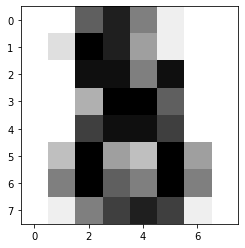

In [ ]:
plt.imshow(digits.images[-1],cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

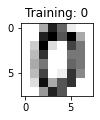

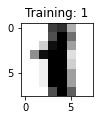

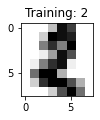

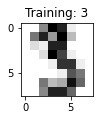

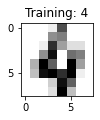

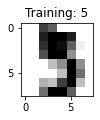

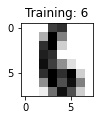

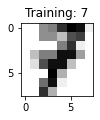

In [ ]:
dig2= datasets.load_digits()
# Join the images and target labels in a list
images_and_labels = list(zip(dig2.images, dig2.target))# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:8]):
    # initialize a subplot of 2X4 at the i+1-th position
    plt.subplot(2, 4, index + 1)
    # Display images in all subplots
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Training: ' + str(label))
    # Show the plot
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)

In [ ]:
# import the model you want to use
from sklearn.linear_model import LogisticRegression

In [ ]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(x_train,y_train)

/home/marriane/home/marriane/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Now we predict
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [ ]:
# Predict multiple images at once 
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [ ]:
# confusion matrix used to measure the accuracy of a classification model
import seaborn as sns
from sklearn import metrics

In [ ]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


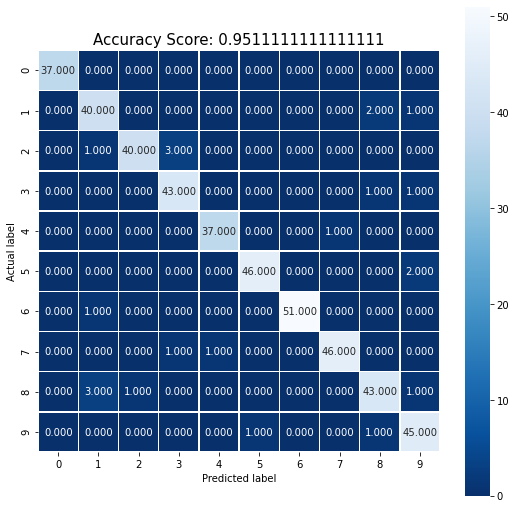

In [ ]:
# making confusion matrix appealing using seaborn
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

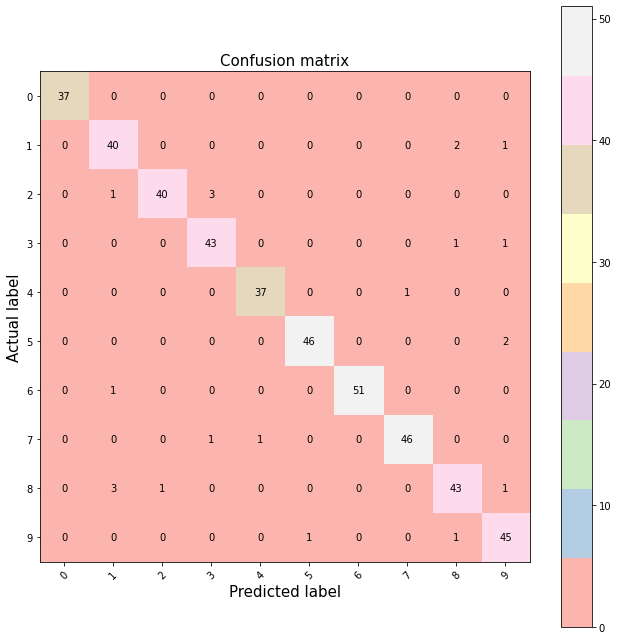

In [ ]:
# Using matplotlib
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

ImportError: cannot import name 'fetch_mldata' from 'sklearn.datasets' (/home/marriane/home/marriane/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/datasets/__init__.py)